In [51]:
import numpy as np
import pickle
import sys
import pandas as pd
import importlib
import my_bite_detection_utils as bdu
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
with open('C:/ASM/DevData/eating/data/steven_uva_lab_data_combined.pkl', 'rb') as file:
    data = pickle.load(file)

In [52]:
#importlib.reload(mtu)
importlib.reload(bdu)
#importlib.reload(mcu)
#importlib.reload(mku)

<module 'my_bite_detection_utils' from 'C:\\ASM\\Dropbox\\Developments\\Jupyter\\Eating\\bite_detection\\my_bite_detection_utils.py'>

In [53]:
res = []
sub_sess_annots = np.empty((0, 4))
sub_sess_segs = np.empty((0, 11))
for subj in range(28):
    for sess in range(len(data[subj])):
        print(subj, sess, end=" :: ")
        d = data[subj][sess]["data"]
        a = data[subj][sess]["annots"]        
        segs = bdu.get_segments(d[:, 1], -0.4, -0.4)
        
        a_count = len(a)
        seg_count = len(segs)
        
        ssa = bdu.get_sub_sess(subj, sess, a_count, 4, dtype =np.int32)        
        ssa[:, 2:] = a
        sub_sess_annots = np.concatenate((sub_sess_annots, ssa))
        
        sss = bdu.get_sub_sess(subj, sess, seg_count, 11, dtype=np.int32)        
        sss[:, 2:4] = segs
        sss[1:, 4] = segs[1:, 0] -segs[:-1, 1] 
        sss[:, 5:7] = bdu.get_covers(segs, a, 0)
        sss[:, 7:9] = bdu.get_covers(segs, a, 16)
        sss[:, 9:11] = bdu.get_covers(segs, a, 32)
        sub_sess_segs = np.concatenate((sub_sess_segs, sss))                                        
        
        seg_duration = np.sum(segs[:, 1]-segs[:,0])/16
        duration = d[-1, 0]
        
        b_count = np.sum(a[:,1]==1)
        s_count = np.sum(a[:,1]==2)
        
        covers = sss[:, 5:]
        cover_count2 = list(np.sum(covers, axis=0))
        blank_count0 = np.sum((covers[:, 0]==0) & (covers[:, 1]==0))
        blank_count1 = np.sum((covers[:, 2]==0) & (covers[:, 3]==0))
        blank_count2 = np.sum((covers[:, 4]==0) & (covers[:, 5]==0))
        multi_count0 = np.sum((covers[:, 0]+covers[:,1])>1)
        multi_count1 = np.sum((covers[:, 2]+covers[:,3])>1)
        multi_count2 = np.sum((covers[:, 4]+covers[:,5])>1)
        dupli_count0 = np.sum((covers[:, 0]>0) & (covers[:, 1]>0))
        dupli_count1 = np.sum((covers[:, 2]>0) & (covers[:, 3]>0))
        dupli_count2 = np.sum((covers[:, 4]>0) & (covers[:, 5]>0))
        
        
        r = [subj, sess, duration, a_count, b_count, s_count, seg_count, seg_duration]
        r.extend(cover_count2)
        r.extend([blank_count0, blank_count1, blank_count2, multi_count0, multi_count1, multi_count2, dupli_count0, dupli_count1, dupli_count2])
            
        #print(r)
        res.append(r)
res = np.array(res)
print(np.unique(sub_sess_segs[:,1]))

0 0 :: 1 0 :: 2 0 :: 2 1 :: 3 0 :: 3 1 :: 4 0 :: 4 1 :: 5 0 :: 5 1 :: 6 0 :: 6 1 :: 7 0 :: 8 0 :: 9 0 :: 10 0 :: 11 0 :: 12 0 :: 13 0 :: 14 0 :: 15 0 :: 16 0 :: 17 0 :: 18 0 :: 19 0 :: 20 0 :: 21 0 :: 21 1 :: 22 0 :: 22 1 :: 22 2 :: 22 3 :: 23 0 :: 23 1 :: 24 0 :: 24 1 :: 25 0 :: 25 1 :: 25 2 :: 25 3 :: 26 0 :: 26 1 :: 26 2 :: 26 3 :: 26 4 :: 27 0 :: [0. 1. 2. 3. 4.]


In [55]:
from IPython.display import display, HTML
res = np.array(res)
cols = ['subj', 'sess', 'data duration', 'annot_count', 'bite_count', 'sip_count','seg_count', 'seg_duration']
cols.extend(['bcov0', 'scov0', 'bcov1', 'scov1', 'bcov2', 'scov2'])
cols.extend(['blank0', 'blank1', 'blank2', 'multi0', 'multi1', 'multi2', 'dupli0', 'dupli1', 'dupli3'])
df = pd.DataFrame(res, columns=cols)
df.append(df.sum(numeric_only=True), ignore_index=True)
df.to_csv('res.csv', sep=',')
display(df)

print(np.sum(res, axis=0).astype(int))

,subj,sess,data duration,annot_count,bite_count,sip_count,seg_count,seg_duration,bcov0,scov0,...,scov2,blank0,blank1,blank2,multi0,multi1,multi2,dupli0,dupli1,dupli3
0,0.0,0.0,23392.8750,380.0,320.0,60.0,1586.0,7740.6875,263.0,59.0,...,74.0,1347.0,1290.0,1224.0,69.0,77.0,94.0,1.0,1.0,2.0
1,1.0,0.0,21589.8125,42.0,32.0,10.0,747.0,10514.1875,14.0,10.0,...,10.0,725.0,718.0,709.0,2.0,2.0,2.0,0.0,0.0,0.0
2,2.0,0.0,22952.5625,143.0,132.0,11.0,877.0,3769.5000,77.0,11.0,...,12.0,792.0,732.0,698.0,3.0,5.0,17.0,0.0,1.0,1.0
3,2.0,1.0,21210.1875,42.0,33.0,9.0,1230.0,5323.6875,32.0,8.0,...,10.0,1191.0,1189.0,1185.0,1.0,1.0,5.0,0.0,0.0,0.0
4,3.0,0.0,21956.2500,109.0,106.0,3.0,642.0,3736.0625,104.0,2.0,...,3.0,611.0,611.0,600.0,13.0,13.0,18.0,0.0,0.0,0.0
5,3.0,1.0,21660.8750,113.0,94.0,19.0,585.0,2031.0000,87.0,13.0,...,15.0,519.0,512.0,497.0,20.0,20.0,20.0,0.0,0.0,0.0
6,4.0,0.0,21973.6875,188.0,162.0,26.0,551.0,2694.4375,156.0,26.0,...,26.0,385.0,370.0,343.0,7.0,8.0,40.0,0.0,0.0,0.0
7,4.0,1.0,21648.5625,89.0,60.0,29.0,387.0,887.8750,41.0,12.0,...,15.0,338.0,327.0,317.0,3.0,3.0,3.0,1.0,1.0,1.0
8,5.0,0.0,21246.9375,114.0,99.0,15.0,411.0,1323.8750,79.0,15.0,...,17.0,321.0,294.0,287.0,4.0,4.0,6.0,0.0,0.0,0.0
9,5.0,1.0,22633.5625,101.0,84.0,17.0,475.0,1638.5625,49.0,15.0,...,17.0,427.0,407.0,390.0,8.0,8.0,9.0,1.0,1.0,1.0


[   711     30 306710   3842   2955    887  14664  75152   2581    786
   2996    886   3591   1056  12128  11650  11050    286    314    459
     10     11     14]


In [ ]:
ssa = sub_sess_annots
sss = sub_sess_segs

a = sss[:, 4]/16
a = a[a<=10]
plt.hist(a, bins=50)
#plt.xlim([0, 5])
plt.show()

a = (sss[:, 3]-sss[:, 2])/16
b = sss[a>60, 0:4]
print(len(b))
print(b)

print(np.sum(a<=1))
a = a[a<=10]
plt.hist(a, bins=50)
#plt.xlim([0, 5])
plt.show()

In [ ]:
sss = sub_sess_segs
dur = (sss[:, 3]-sss[:, 2])/16
print(len(dur))
b = sss[dur>60, 0:4]
print(len(b))

for i in range(10):
    subj, sess = int(b[i, 0]), int(b[i, 1])
    d = data[subj][sess]["data"]
    a = data[subj][sess]["annots"]

    si, ei = int(b[i,2]), int(b[i,3])
    print(si, ei)
    
    plt.plot(d[si:ei, 0], d[si:ei, 1:4])
    plt.grid(True)
    plt.show()

(3614, 11)
3087


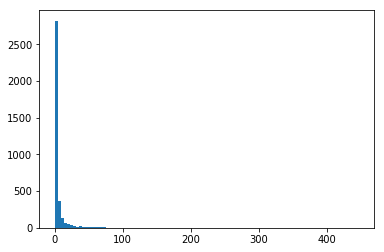

In [46]:
sss = sub_sess_segs
c = sss[:, 9]+sss[:, 10]
s = sss[c>0]
#print(np.sum(c>0))
print(s.shape)

dur = (s[:, 3]-s[:, 2])/16
print(np.sum(dur<7))
plt.hist(dur, bins=100)
plt.show()
